In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(5)

,Age,EstimatedSalary,Purchased
317,35,55000,0
117,36,52000,0
302,37,137000,1
220,41,80000,0
18,46,28000,1


**Splitting of Training and Testing Data**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

__Standard Scaler__

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.71666667e+01, 6.95916667e+04])

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
np.round(X_test_scaled.describe(), 2)

,Age,EstimatedSalary
count,120.00,120.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.73,-1.66
25%,-0.83,-0.69
50%,-0.11,-0.16
75%,0.73,0.53
max,2.06,2.45


In [11]:
np.round(X_train.describe(), 2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [12]:
np.round(X_train_scaled.describe(), 2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


__Effect of Scaling__

[Text(0.5, 1.0, 'After Scaling')]

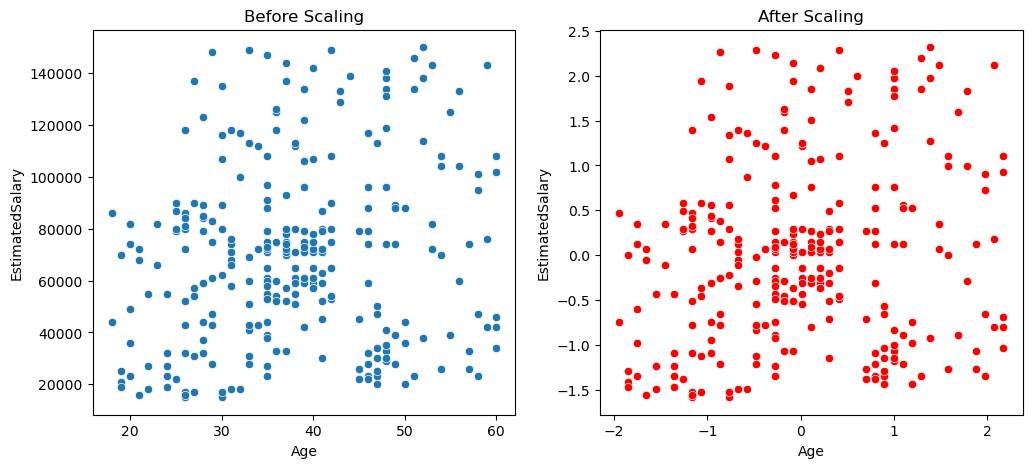

In [14]:
fig, axis = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(data = X_train, x=X_train['Age'], y=X_train['EstimatedSalary'], ax=axis[0]).set(title='Before Scaling')
sns.scatterplot(data=X_train, x=X_train_scaled['Age'], y=X_train_scaled['EstimatedSalary'], color='red', ax=axis[1]).set(title='After Scaling')

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

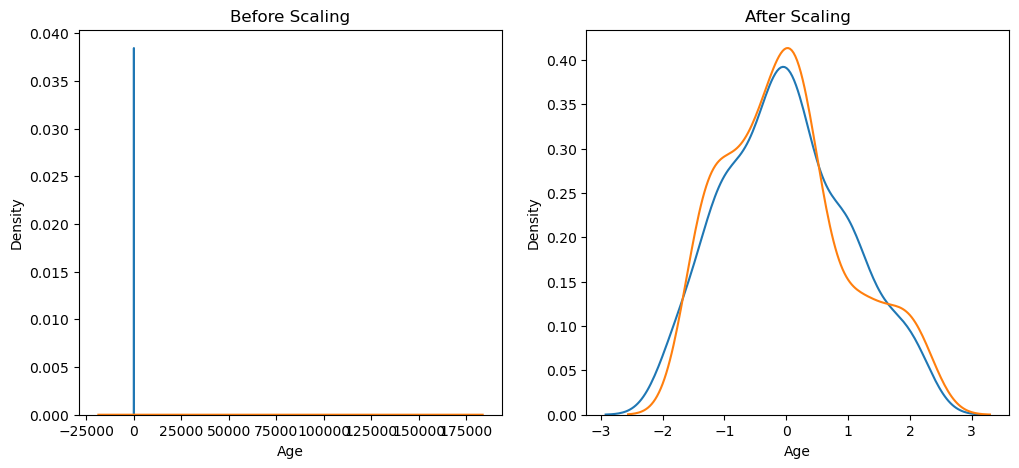

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

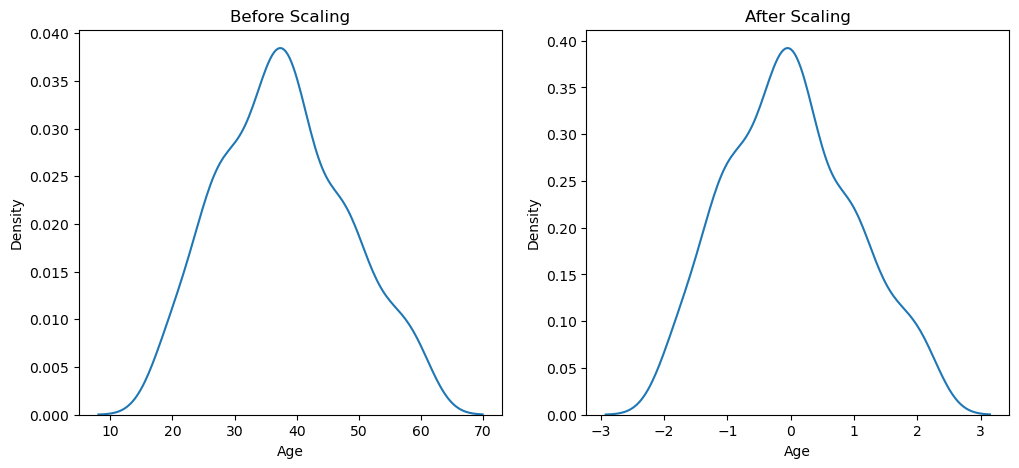

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
sns.kdeplot(ax=ax1, x=X_train["Age"])
sns.kdeplot(ax=ax2, x=X_train_scaled['Age'])

<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

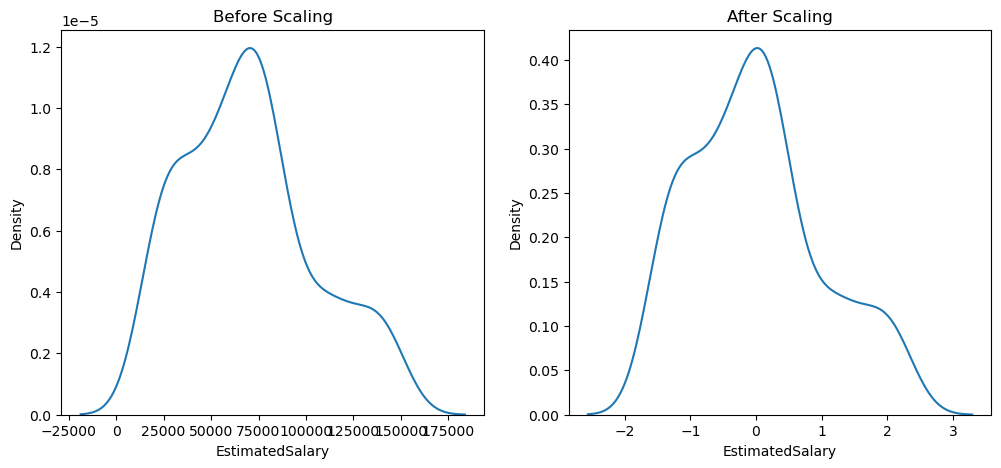

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
sns.kdeplot(ax=ax1, x=X_train["EstimatedSalary"])
sns.kdeplot(ax=ax2, x=X_train_scaled['EstimatedSalary'])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_pred_scaled, y_test))

Actual 0.6583333333333333
Scaled 0.375


In [23]:
from sklearn.preprocessing import MinMaxScaler
mnscaler = MinMaxScaler()
mnscaler.fit(X_train)
X_train_scaled_mx = mnscaler.transform(X_train)
X_test_scaled_mx = mnscaler.transform(X_test)
X_train_scaled_mx = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_mx = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
np.round(X_train_scaled_mx.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


<Axes: title={'center': 'After Scaling (Min-Max)'}, xlabel='EstimatedSalary', ylabel='Density'>

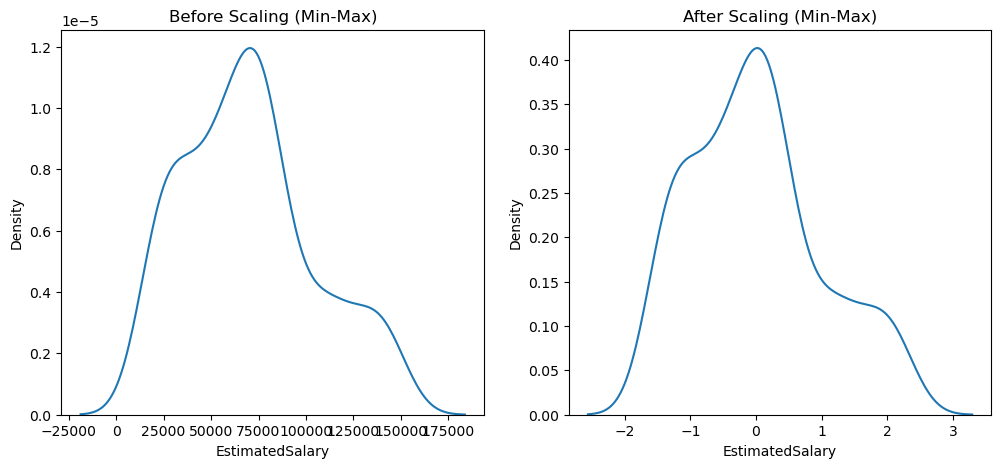

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_title('Before Scaling (Min-Max)')
ax2.set_title('After Scaling (Min-Max)')
sns.kdeplot(x=X_train['EstimatedSalary'], ax=ax1)
sns.kdeplot(x=X_train_scaled_mx['EstimatedSalary'], ax=ax2)

In [26]:
lr_scaled_max = LogisticRegression()
lr_scaled_max.fit(X_train_scaled_mx, y_train)

LogisticRegression()

In [27]:
y_pred_scaled_mx = lr_scaled_max.predict(X_test_scaled_mx)
print('Min-Max Scaled Accuracy Score:', accuracy_score(y_pred_scaled_mx, y_test))

Min-Max Scaled Accuracy Score: 0.8916666666666667
